# Test with delay 10 min
CONTROL(30')-SHOCK(60')-GREY(10')-TEST(30')

Test with an additional session between 'SHOCK' and 'TEST', where all patterns are switched to grey 'ggg'. Otherwise there are 3 patterns, e.g. 'xiv' or 'vxi', shocks are applied in prefered arm (identified after CONTROL).

Main question: is the decay of memory, seen in [test](/tree/notebooks/protocol_analysis/test.ipynb), explained by extinction or simple forgetting?

If lowered occupancy is still lasting 10-15 min in 'TEST' session, then it is an indication of extinction.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import anchovy.md as md
import anchovy.analysis as analysis
import anchovy.plotting as plotting
import anchovy.classify as cl

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


In [2]:
from importlib import reload

In [3]:
def load_and_filter(ssub):
    over = ft['Overstayer']
    ssub = ssub.loc[~ssub.xp_id.isin(over)]
    center = ft['Center']
    all_ss = len(ssub.ss_no.unique())
    print("{} fish in the selection after {} overstayers were exluded".format(int(ssub.shape[0]/all_ss), len(over)))
    ssub = ssub.loc[~ssub.xp_id.isin(center)]
    print("{} fish in the selection after {} overcentrals were exluded".format(int(ssub.shape[0]/all_ss), len(center)))
    return ssub

In [14]:
reload(md)
reload(analysis)
ft = analysis.fish_types(md.ssa_delay_10[md.xp_new])
ss_sub = load_and_filter(md.ssa_delay_10[md.xp_new])

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


27 fish in the selection after 4 overstayers were exluded
22 fish in the selection after 5 overcentrals were exluded


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [15]:
ft

{'Center': ['290318-12-01',
  '040418-04-01',
  '100418-03-01',
  '160418-01-01',
  '160418-06-01'],
 'Non-responder': ['110418-06-01'],
 'One arm': ['030418-02-01',
  '040418-01-01',
  '040418-02-01',
  '290318-13-01',
  '040418-03-01',
  '040418-05-01',
  '040418-06-01',
  '100418-04-01',
  '090418-01-01',
  '100418-05-01',
  '100418-06-01',
  '110418-05-01',
  '110418-08-01',
  '160418-03-01',
  '160418-04-01',
  '160418-05-01'],
 'Overstayer': ['290318-11-01',
  '110418-07-01',
  '100418-07-01',
  '100418-08-01'],
 'Two arms': ['290318-09-01',
  '290318-10-01',
  '030418-01-01',
  '290318-14-01',
  '160418-02-01']}

In [16]:
avg_e, avg_sum_e = analysis.avg_sliding(ss_sub, analysis.entry)
avg_o, avg_sum_o = analysis.avg_sliding(ss_sub, analysis.occupancy, **{'val': [0,1,2,3]})

22.0
22.0


In [ ]:
def update_sliding(avg, avg_sum, func, ssub=None, **kw):
    if ssub is None:
        ssub = load_and_filter(md.ssa_delay_10[md.xp_new])
    upd_avg = avg.copy()
    upd_avg_sum = avg_sum.copy()
    avg_ids = list(avg[0].columns)
    ssub_ids = ssub.xp_id.unique()
    id_to_add = [x for x in ssub_ids if x not in avg_ids]
    if id_to_add:
        avg_to_add, avg_sum_to_add = analysis.avg_sliding(ssub.loc[ssub.xp_id.isin(id_to_add)], func, **kw)
        for i in range(len(avg_to_add)):
            upd_avg[i] = pd.concat([upd_avg[i], avg_to_add[i]], axis=1)
        upd_avg_sum = pd.concat([upd_avg_sum, avg_sum_to_add], axis=1)
    return upd_avg, upd_avg_sum

In [ ]:
reload(md)
ss_sub = load_and_filter(md.ssa_delay_10[md.xp_new])
avg_e, avg_sum_e = update_sliding(avg_e, avg_sum_e, analysis.entry, ssub=ss_sub)
avg_o, avg_sum_o = update_sliding(avg_o, avg_sum_o, analysis.occupancy, ssub=ss_sub, **{'val':[0,1,2,3]})

6.13722222222


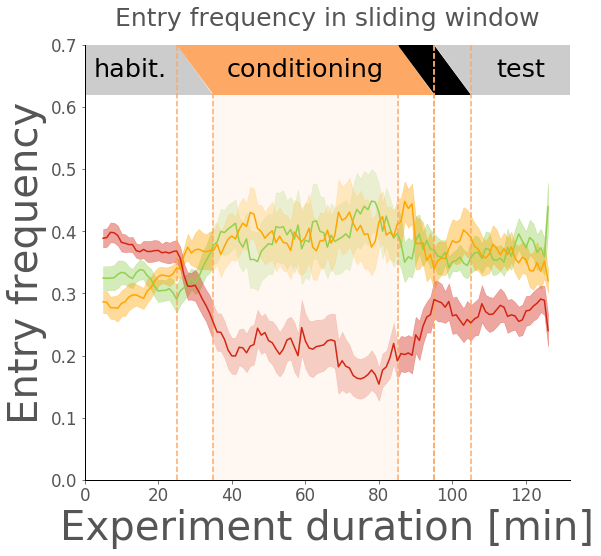

In [17]:
# plot sliding window for entry frequency, excluding overstayers
# NOTE: Number of entries decreases dramatically over time
# Look at entries to arms 0, 1, and 2.
reload(plotting)
plotting.plot_sliding(ss_sub, analysis.entry, avg=avg_e, avg_sum=avg_sum_e, excl=True, #sign=sign, # individ=True,
                      name='Entry frequency in sliding window',# show_val=[0],
                      fg_sz=(8.7,8), **{'val': [0,1,2]})

6.13722222222


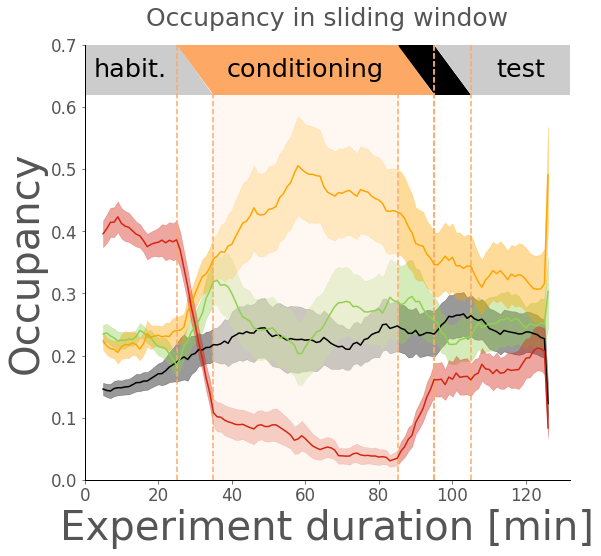

In [18]:
# plot sliding window for arm occupancy, excluding overstayers
# Look at occupancy of arms 0, 1, 2, and 3.
plotting.plot_sliding(ss_sub, analysis.occupancy, avg=avg_o, avg_sum=avg_sum_o, excl=True,# individ=True,
                      name='Occupancy in sliding window',# show_val=[0],
                      fg_sz=(8.7,8), **{'val': [0,1,2, 3]})

___

16.0
6.13722222222


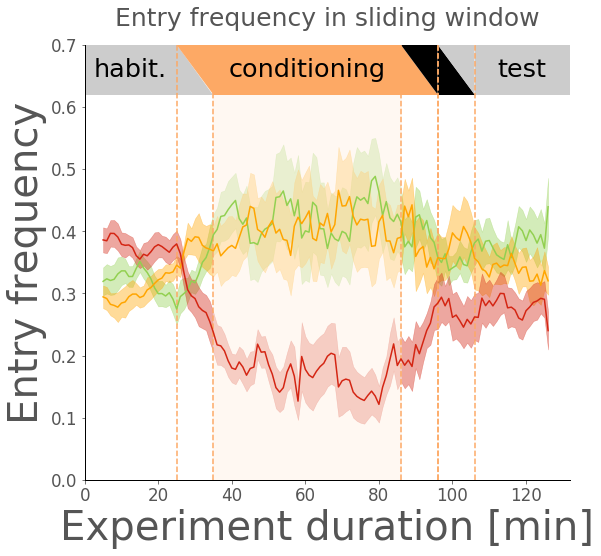

In [19]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])], analysis.entry, excl=True, #sign=sign, # individ=True,
                      name='Entry frequency in sliding window',# show_val=[0],
                      fg_sz=(8.7,8), **{'val': [0,1,2]})

16.0
6.13722222222


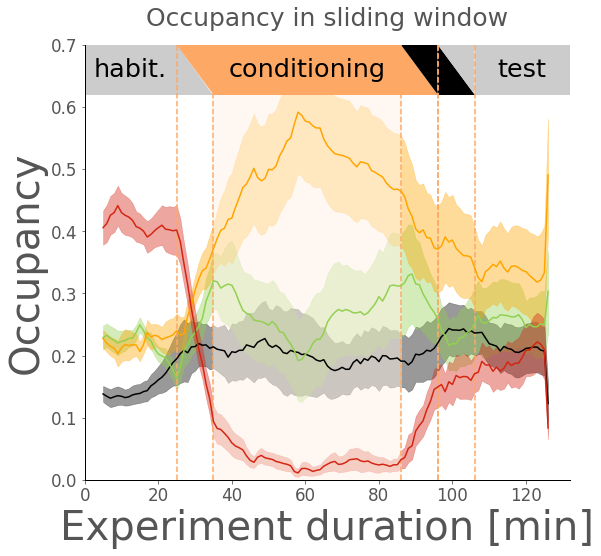

In [20]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])], analysis.occupancy, excl=True, #sign=sign, # individ=True,
                      name='Occupancy in sliding window',# show_val=[0],
                      fg_sz=(8.7,8), **{'val': [0,1,2,3]})

___

5.0
6.13722222222


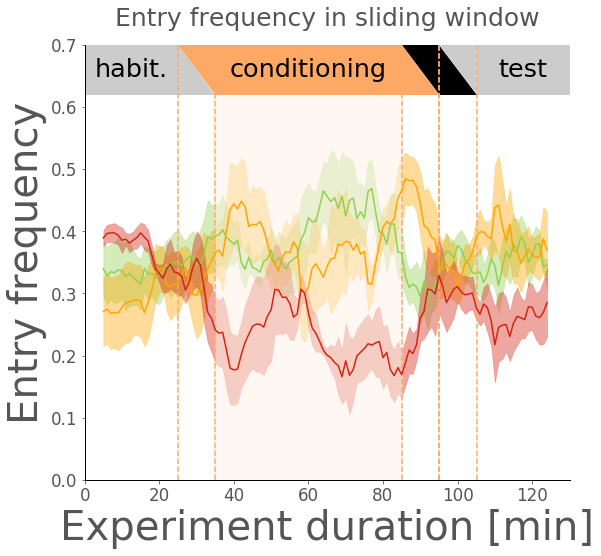

In [21]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], analysis.entry, excl=True, #sign=sign, # individ=True,
                      name='Entry frequency in sliding window',# show_val=[0],
                      fg_sz=(8.7,8), **{'val': [0,1,2]})

5.0
6.13722222222


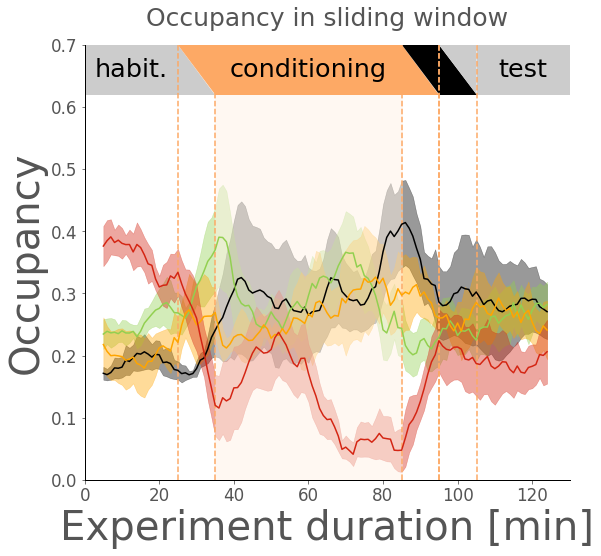

In [22]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], analysis.occupancy, excl=True, #sign=sign, # individ=True,
                      name='Occupancy in sliding window',# show_val=[0],
                      fg_sz=(8.7,8), **{'val': [0,1,2,3]})